# Demo of USM Renyi Entropy in Python
**How to compute continuous Renyi entropy of USM using the pyusm library**
By Katherine Wuestney

**Contents**  

* [Introduction](#Intro)
    - [Terminology Introduction](#termintro)
* [Section 1](#Section1) Renyi continuous entropy of USM
    - [Section 1.1](#Section1.1) Renyi Continuous Entropy
    - [Section 1.2](#Section1.2) Parzen Window Kernel Density Estimation
    - [Section 1.3](#Section1.3) Equation of *d*-dimensional Renyi Entropy of USM
* [Section 2](#Section2) Demo of usm_entropy module
    - [Section 2.1](#Section2.1) Simplification of Entropy Equation
* [Section 3](#Section3)
    - [Section 3.1](#Section3.1) 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pyusm
from pyusm import usm_entropy
from pyusm.tests.test_usm_entropy import parse_rn2_file as parse_rn2_file

<a id='Intro'></a>
## Intro and review

Universal Sequence Maps (USM) [1](#1) are a generalized version of the CGR maps first introduced by Jeffrey [2](#2) and they function as generalized order-free Markov transition matrices of symbolic sequences. This property in particular, allows for us to compute a generalized entropy estimate of the sequence based on the density of USM coordinates themselves. For more background on USM see the notebook demonstration ['demo_usm_make' ](demo_usm.ipynb). Vinga and Almeida  introduced a continuous quadratic Renyi entropy of the USM of DNA sequences in [3](#3) which demonstrated promising discriminatory power. We build off of their work by implementing their algorithms in python and generalizing their entropy measure to *d*-dimensional USM. Proofs of the generalized equations are included in the sections below. In many aspects the usm_entropy module uses the original javascript and matlab toolkit (found at the github repository [usm.github.com](https://github.com/usm/usm.github.com.git)) as a template, however, we make notable deviations from the original algorithms in order to implement the generalized equations and to be more pythonic. 

<a id='termintro'></a>
## Terminology Introduction - Use this section as a glossary
The topics presented in this notebook are highly cross-disciplinary and as such there are a variety of different terms used in the literature to refer to the same basic concepts. To ensure clarity of discussion we will define the following within the context of symbolic sequence analysis:
* **Symbol** - a nominal data element which has no numeric magnitude in the general Euclidean sense. Symbols are common data types encountered in linguistics and natural language processing, information theory and cryptography as well as genomics. A symbol is congruous with a single category of a categorical variable. A symbol can be anything, including numbers, but it does not behave like regular numbers do as it is generally a proxy "symbolizing" some other construct.

* **Sequence** or **Symbolic sequence** - a set of indexed symbols for which the order of the symbols is integral and thus object of analysis. Sequences are commonly encountered in genomics, time series analysis, linguistics and natural language processing, among others. Synonyms of sequence include strings, series, or sometimes vectors. 

* **Generating function** - a process or phenomenon which produces or is represented by a sequence of symbols.

* **Alphabet** - the set of all possible symbols a generating function may produce. For example, if our sequence is a paragraph of a Charles Dickens novel, our generating function could be considered 19th century English typography, and our alphabet would be the 26 letters of the English alphabet plus each punctuation character and special character in use during that time. The term alphabet is congruous to the term "state space" from dynamical systems, in that the alphabet functions as the basic state space of a symbolic generating function. There are many different ways the size of an alphabet is refered to in the literature but for this discussion here we will refer to an alphabet's size as its dimension *d*.

* **k-gram** - a subsequence of a longer sequence comprising of k sequential symbols. For example, if our sequence is "ACTGGCA", "TG" would be a k-gram with k=2. In symbolic sequence analysis we are often most interested in the frequency and patterns of k-grams of various lengths. Synonyms for k-gram include L-tuple, subsequence, words, motifs, sub-strings, or vectors. 

* **Suffix** - the k-gram occurring at the very end of a sequence. For "ACTGGCA", its length 3 suffix is the k-gram "GCA".

* **Prefix** - the k-gram occurring at the very beginning of a sequence.

<a id='Section1'></a>
# Section 1 Renyi Continuous Entropy of USM
Early on researchers suggested that the complexity of discrete patterns in a sequence could be measured by measuring the density distribution of the CGR and USM plots and Vinga and Almeida took this a step further in [3](#3) by proposing an entropy measure of USM plots that combines the continuous Renyi quadratic entropy with a Parzen kernel density estimate. The method uses a spherical symmetric Gaussian kernel with mean zero and diagonal covariance matrix $\Sigma = \sigma^2I_d$ where $I_d$ is the *dxd* identity matrix. The original paper establishing this measure only tests it for alphabets of size 4 so we must first generalize the equations to alphabets of arbitrary size *d*. The equation given by Vinga and Almeida for 4-dimensional USM is:
<a id='Eq1.1'></a>
$$
\begin{equation}
H_2(USM) = -ln \frac{1}{N^2} \sum_{i=1}^{N} \sum_{j=1}^{N} \frac{1}{16\pi^2\sigma^4}\exp\left(-\frac{1}{4\sigma^2}d_{ij}\right)
\tag{1.1}
\end{equation}
$$

where $d_{ij}$ is the squared Euclidean distance between the USM coordinates $a_i$ and $a_j$ [3](#3).

The next sections introduce the Renyi Continuous Entropy formula, Parzen kernel density formula, and the proof of the Renyi Continuous entropy of *d*-dimensional USM. 

<a id='Section1.1'></a>
### 1.1 Renyi Continuous Entropy
Renyi entropy was instroduced as a generalization of Shannon entropy and includes an order parameter $\alpha$ which in part, determines the weighted contribution of improbable events to the overall entropy measure. The limit of Renyi entropy $\lim_{\alpha \to 1}H_{\alpha}(X)$ is Shannon's original entropy measure. The formula for Renyi entropy of a continous probability density function $f(x)$ is:

$$
\begin{equation}
H_{\alpha}(X) = \frac{1}{1-\alpha}\ln\int f^{\alpha}(x)dx
\end{equation}
$$

Vinga and Almeida utilize the Renyi quadratic ($\alpha = 2$) continuous entropy formula for their USM entropy measure [3](#3) which is given here:
<a id='Eq1.1.1'></a>

$$
\begin{align}
H_{\alpha}(X) & = \frac{1}{1-2}\ln\int f^{2}(x)dx \\
& = -\ln\int f^{2}(x)dx
\tag{1.1.1}
\end{align}
$$

It is worth note that the statistic Sample Entropy which is based on the correlation integral by Grassberger and Procaccia functions as an estimate of the quadratic Renyi entropy since the correlation integral is also an estimate of quadratic Renyi entropy.

<a id='Section1.2'></a>
### 1.2 Parzen Window Kernel Density Estimation
Vinga and Almeida employ a Parzen window method to estimate the probability density function fed to the Renyi continuous entropy formula. The Parzen window method takes a linear combination of smooth, continuous, differentiable weighting functions called the kernel function, one centered on each sample point $a_i$ in the observed sample. The output of this linear combination gives the estimated density function $\hat{f}(x)$ of the distribution at all values of $x$. This is represented by the equation below where $x$ is the *d*-dimensional vector valued random variable in $\mathbf{R}^d$, $a = \left\{a_1, a_2, \dots, a_N\right\}$ is the sample of $x$ of size $N$, and $\kappa()$ is the kernel weighting function applied to the distance between a value in $x$ and each $a_i$ in the sample $a$:
$$
\begin{equation}
\hat{f}(x;a) = \frac{1}{N}\sum_{i=1}{N}\kappa(x-a_i)
\tag{1.2.1}
\end{equation}
$$

Vinga and Almeida use the spherical symmetric *d*-dimensional Gaussian kernel $g_d$ with a fixed volume defined by the parameter $\sigma^2$, the variance of the Gaussian distribution. Recall the general *d*-dimensional Gaussian distribution with mean $\mu$ and covariance matrix $\Sigma$ is defined by the equation:
$$
\begin{equation}
g_d(x;\mu,\Sigma) = \frac{1}{(2\pi)^{d/2}|\Sigma|^{1/2}}e^{\left(-\frac{1}{2}(x - \mu)^T\Sigma^{-1}(x-\mu)\right)}
\tag{1.2.2}
\end{equation}
$$

where $x^T$ is the transpose vector of $x$ and $|\Sigma|$ is the determinant of the covariance matrix. 

In the case of the a spherical symmetric Gaussian kernel, the covariance matrix $\Sigma$ is diagonal and is equivalent to $\sigma^2I_d$ where $I_d$ is the *dxd* identity matrix and $\sigma^2$ is a fixed arbitrary variance.

If we substitute $g_d(x;0, \sigma^2I_d)$ for $\kappa()$ in the kernel density estimate equation we get:
<a id='Eq1.2.3'></a>
$$
\begin{align}
\hat{f}(x;a) & = \frac{1}{N}\sum_{i=1}^{N} g_d(x;0, \sigma^2I_d) \\
& = \frac{1}{N}\sum_{i=1}^{N}\frac{1}{(2\pi)^{d/2}|\sigma^2I_d|^{1/2}}e^{\left(-\frac{1}{2}(x - a_i)^T(\sigma^2I_d)^{-1}(x-a_i)\right)} \\
\end{align}
\tag{1.2.3}
$$

<a id='Section1.3'></a>
### 1.3 Equation of *d*-dimensional Renyi Entropy of USM
Next we establish the equation for quadratice Renyi entropy of *d*-dimensional USM.

We first substitute the kernel density equation with spherical Gaussian kernel ([Eq. 1.2.3](#Eq1.2.3)] for $f(x)$ in the equation for continuous quadratic Renyi entropy ([Eq. 1.1](#Eq1.1)):
$$
\begin{align}
H_2(USM) & = -\ln\int\left(\frac{1}{N}\sum_{i=1}^{N}\frac{1}{(2\pi)^{d/2}|\sigma^2I_d|^{1/2}}e^{\left(-\frac{1}{2}(x - a_i)^T(\sigma^2I_d)^{-1}(x-a_i)\right)}\right)^2dx \\
& = -\ln\int\frac{1}{N^2}\sum_{i=1}^{N}\sum_{j=1}^{N}\left(\frac{1}{(2\pi)^{d/2}|\sigma^2I_d|^{1/2}}e^{\left(-\frac{1}{2}(x - a_i)^T(\sigma^2I_d)^{-1}(x-a_i)\right)}\right)\times \\
& \qquad \qquad \qquad \qquad \qquad \ \left(\frac{1}{(2\pi)^{d/2}|\sigma^2I_d|^{1/2}}e^{\left(-\frac{1}{2}(x - a_j)^T(\sigma^2I_d)^{-1}(x-a_j)\right)}\right)dx
\end{align}
$$

Using the constant coefficient rule of integration and the sum rule of integration (the integral of the sums of functions equals the sum of their integrals) we can move the integral operator within the summation operators and we now see that we are taking a convolution of the two Gaussians. 

$$
\begin{align}
H_2(USM)  = -\ln\frac{1}{N^2}\sum_{i=1}^{N}\sum_{j=1}^{N}\int & \left(\frac{1}{(2\pi)^{d/2}|\sigma^2I_d|^{1/2}}e^{\left(-\frac{1}{2}(x - a_i)^T(\sigma^2I_d)^{-1}(x-a_i)\right)}\right)\times \\
& \ \ \ \left(\frac{1}{(2\pi)^{d/2}|\sigma^2I_d|^{1/2}}e^{\left(-\frac{1}{2}(x - a_j)^T(\sigma^2I_d)^{-1}(x-a_j)\right)}\right)dx
\end{align}
$$

The convolution of two Gaussians, $g_d(x;\mu_1, \Sigma_1)$ and $g_d(x; \mu_2, \Sigma_2)$, is another Gaussian (proof available in the supplementary material of [3](#3)) of the form:

$$
g_d(x; \mu_1 + \mu_2, \Sigma_1 + \Sigma_2) = \frac{1}{(2\pi)^{d/2}|\Sigma_1 + \Sigma_2|^{1/2}}e^\left(-\frac{1}{2}(\mu_1 - \mu_2)^T(\Sigma_1 + \Sigma_2)^{-1}(\mu_1 - \mu_2)\right)
$$

So here we get

$$
H_2(USM) = -\ln\frac{1}{N^2}\sum_{i=1}^{N}\sum_{j=1}^{N}\frac{1}{(2\pi)^{d/2}|\sigma^2I_d + \sigma^2I_d|^{1/2}}e^{\left(-\frac{1}{2}(a_i - a_j)^T(\sigma^2I_d + \sigma^2I_d)^{-1}(a_i - a_j)\right)}
$$

Because we are using a fixed kernel volume approach, $\sigma^2$ is held constant across all kernels in the equation and so we can further simplify $\sigma^2I_d + \sigma^2I_d$ to $2\sigma^2I_d$. Then the following terms become:  

$$
\begin{align}
|2\sigma^2I_d|^{1/2} & = (2^d\sigma^{2d})^{1/2} \\
& = 2^{d/2}\sigma^d
\end{align}
$$ 

and 

$$
(2\sigma^2I_d)^{-1} = \frac{1}{2\sigma^2}I_d
$$

The former due to the fact the determinant of a *dxd* diagonal matrix is equal to the product of the elements of the principal diagonal which in the case of a scalar matrix, (i.e. $cI_d$), is the scalar constant raised to the *d<sup>th</sup>* power, $|cI_d| = c^d$ [4](#4). The latter due to the fact that the inverse of a diagonal matrix is a diagonal matrix with the reciprocal of the elements of the original matrix as the elements on its principal diagonal, which in this case is $\frac{1}{2\sigma^2}$.

Plugging these two simplified terms into the entropy equation and we can perform further simplifications based on the properties of matrix-vector multiplication involving scalars and the identity matrix [4](#4):

$$
\begin{align}
H_2(USM) & = -\ln\frac{1}{N^2}\sum_{i=1}^{N}\sum_{j=1}^{N}\frac{1}{(2\pi)^{d/2}2^{d/2}\sigma^d}e^{\left(-\frac{1}{2}(a_i - a_j)^T\frac{1}{2\sigma^2}I_d(a_i - a_j)\right)} \\
& = -\ln\frac{1}{N^2}\sum_{i=1}^{N}\sum_{j=1}^{N}\frac{1}{2^{d/2}\pi^{d/2}2^{d/2}\sigma^d}e^{\left(-\frac{1}{2 \cdot 2\sigma^2}(a_i - a_j)^T(a_i - a_j)\right)} \\
& = -\ln\frac{1}{N^2}\sum_{i=1}^{N}\sum_{j=1}^{N}\frac{1}{2^{d}\pi^{d/2}\sigma^d}e^{\left(-\frac{1}{4\sigma^2}(a_i - a_j)^T(a_i - a_j)\right)} \\
& = -\ln\frac{1}{N^2}\sum_{i=1}^{N}\sum_{j=1}^{N}\frac{1}{(2\pi^{1/2}\sigma)^d}e^{\left(-\frac{1}{4\sigma^2}(a_i - a_j)^T(a_i - a_j)\right)}
\end{align}
$$

It can be proved that, for $u$ and $v$ *d*-vectors, the product of the vector of the form $(u-v)$ with its transpose $(u-v)^T$ is equivalent to the squared Euclidean distance between $u$ and $v$ (proof omitted). Following the notation of [3](#3), let $d_{ij}$ represent the squared Euclidean distance between $a_i$ and $a_j$, then we rewrite the entropy equation as:
<a id='Eq1.3.1'></a>
$$
\begin{equation}
H_2(USM) = -\ln\frac{1}{N^2}\sum_{i=1}^{N}\sum_{j=1}^{N}\frac{1}{(2\pi^{1/2}\sigma)^d}e^{\left(-\frac{1}{4\sigma^2}d_{ij}\right)}
\tag{1.3.1}
\end{equation}
$$

which we can see is congruous with [Eq. 1.1](#Eq1.1).  

Page 175 of [4](#4) discusses theorem of determinant of triangular, and thus by extension diagonal, matrices.  

Theorem 5 on page 41 of [4](#4) gives properties of matrix-vector multiplication. Scalar multiplication with vectors is commutative, ie we can move $\frac{1}{2\sigma^2}$ to the left of the vector. A vector multiplied by the identity matrix of the same order equals the vector $I_dx = x$.

<a id='Section2'></a>
# Section 2 Demo of usm_entropy module


<a id='Section2.1'></a>
### 2.1 Simplification of Entropy Equation for Python Implementation

In the implementation of [Eq. 1.3.1](#Eq1.3.1) in the function usm_entropy.renyi2usm() we utilize the function pdist() from the module scipy.spatial.distance which calculates the pairwise distance between  
Moving the constants outside of the summation and we can then simplify even further due to the fact that all the pairwise distances of the form $d_{ii} = 0$ and therefore $\sum_{\substack{i=j \\ i,j = 1}}^{N}e^{\left(-\frac{1}{4\sigma^2} \cdot \ 0\right)} = N$ and the fact that for the remainder of the pairwise distances, $d_{ij} = d_{ji}$, and so the sum of the pairwise distances where $i \neq j$ can be obtained by $2 \cdot \sum_{\substack{i<j \\ i,j = 1}}^{N}e^{\left(-\frac{1}{4\sigma^2}d_{ij}\right)}$.

Finally we obtain the equation for Renyi entropy of a *d*-dimensional USM of *N* sample coordinates where $d_{ij}$ is the squared Euclidean distance between sample USM coordinates $a_i$ and $a_j$:  
<a id='Eq2.1.1'></a>
$$
\begin{equation}
H_2(USM) = -\ln\frac{1}{N^2(2\pi^{1/2}\sigma)^d}\times\left[N + 2 \cdot\sum_{\substack{i<j \\ i,j = 1}}^{N}e^{\left(-\frac{1}{4\sigma^2}d_{ij}\right)}\right]
\tag{2.1.1}
\end{equation}
$$


<a id='Section2.2'></a>
### 2.2 usm_entropy.renyi2usm()
Equation [2.1.1](#Eq2.1.1) is implemented by the function renyi2usm() in the usm_entropy.py module. 
> renyi2usm(cgr_coords, sig2v=SIG2V_DEFAULT, refseq=None, Plot=True, filesave=False, deep_copy=True)  

The function expects only one set of usm coordinates at a time, either forward or backward. If no values for sig2 then the default sig2 array, equivalent to the ones used in [3](#3) will be used. The functions default action is to calculate the renyi entropy values for each value of sig2 in sig2v and store them in a dictionary as sig2:renyi pairs. If Plot is True then the function will also graph the Renyi values by the natural log of the sig2 values. If filesave is True then this plot will be saved as a png.

[Example 2.2.1](#Ex2.2.1) shows the output of renyi2usm() for the sequence Es.txt used in [3](#3) and compares it to the output from the original matlab code used for [3](#3).

In [2]:
demo_files = Path.cwd()/ "demo_files"
#demo_files

<a id='Ex2.2.1'></a>
#### Example 2.2.1

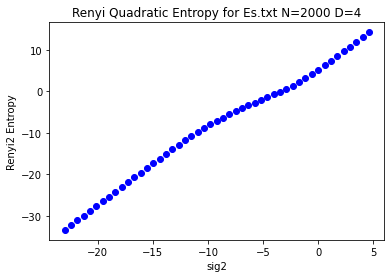

In [3]:
with open(demo_files/'Es.txt', 'r') as fhand:
    seq = list(fhand.read())
usm = pyusm.USM.make_usm(seq)
rn2dict = usm_entropy.renyi2usm(usm.fw, refseq='Es.txt')

In [4]:
rn2filepath = demo_files / "renyi2usm_Es_seq.rn2"
rn2_matlab_list = parse_rn2_file(rn2filepath)

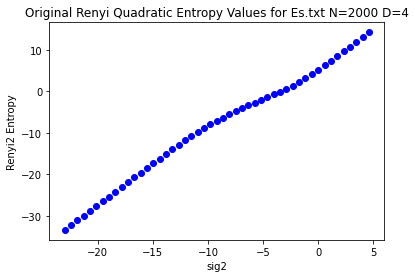

In [5]:
sig2_list, rn2matlab = zip(*rn2_matlab_list)
ln_sig2 = np.log(sig2_list)
plt.plot(ln_sig2, rn2matlab, 'bo')
plt.title("Original Renyi Quadratic Entropy Values for Es.txt N=2000 D=4")
plt.xlabel('sig2')
plt.ylabel('Renyi2 Entropy')
plt.show()

<a id='Section3'></a>
# Section 3 Asymptotic Behavior of Renyi Entropy by Natural Log of Kernel Variance
In the original paper, Vinga and Almeida [3](#3) explore the dependence relationship between the entropy measure and the kernel variance, $\sigma^2$, with the graph of the function $H_2 = H_2(ln\sigma^2)$ and prove this graph has two linear asymptotes of the forms $H_2^+ = \lim_{ln\sigma^2 \to +\infty} H_2(ln\sigma^2) = m ln\sigma^2 + b$ and $H_2^- = \lim_{ln\sigma^2 \to -\infty} H_2(ln\sigma^2) = m' ln\sigma^2 + b'$. Below are proofs of the equations of these asymptotes for the d-dimensional USM. 

<a id='Section3.1'></a>
### 3.1 Asymptote for $\ln\sigma^2 \to +\infty$
We solve for the coefficients, $m$ and $b$, of the asymptote for $ln\sigma^2 \to +\infty$ using the equations given by Vinga and Almeida [3](#3) $m = \lim_{\sigma^2 \to +\infty} \frac{H_2(\sigma^2)}{\ln\sigma^2}$ and $b = \lim_{\sigma^2 \to +\infty} (H_2(\sigma^2) - m \ln \sigma^2)$. 

We begin with $m$ and substitute [Eq. 1.3.1](#Eq1.3.1) for $H_2(\sigma^2)$ in the formula. We then simplify the equation by distributing the exponent *d* in the numerator, splitting the numerator into a sum of three log terms per the product rule, then distributing the negative term across the summation, and transforming the negative log of the fractions into the log of the reciprocals per the rule of cologarithms. 

$$
\begin{align}
m & = \lim_{\sigma^2 \to +\infty} \frac{-\ln\frac{1}{N^2}\sum_{i=1}^{N}\sum_{j=1}^{N}\frac{1}{(2\pi^{1/2}\sigma)^d}e^{\left(-\frac{1}{4\sigma^2}d_{ij}\right)}}{\ln\sigma^2} \\
& = \lim_{\sigma^2 \to +\infty} \frac{-\ln\frac{1}{N^22^d\pi^{d/2}\sigma^d}\sum_{i=1}^{N}\sum_{j=1}^{N}e^{\left(-\frac{1}{4\sigma^2}d_{ij}\right)}}{\ln\sigma^2} \\
& = \lim_{\sigma^2 \to +\infty} \frac{-\ln\frac{1}{N^22^d\pi^{d/2}} -\ln\frac{1}{\sigma^d} - \ln\sum_{i=1}^{N}\sum_{j=1}^{N}e^{\left(-\frac{1}{4\sigma^2}d_{ij}\right)}}{\ln\sigma^2} \\
& = \lim_{\sigma^2 \to +\infty} \frac{\ln(N^22^d\pi^{d/2}) + \ln\sigma^d - \ln\sum_{i=1}^{N}\sum_{j=1}^{N}e^{\left(-\frac{1}{4\sigma^2}d_{ij}\right)}}{\ln\sigma^2} \\
\end{align}
$$
From there we can split the larger fraction into a sum of three fractions with common denominator $\ln\sigma^2$ and by dealing with each individually we get,
<a id='Eq3.1.1'></a>

$$
\begin{align}
m & = \lim_{\sigma^2 \to +\infty} \frac{\ln(N^22^d\pi^{d/2})}{\ln\sigma^2} + \frac{\ln\sigma^d}{\ln\sigma^2} - \frac{\ln\sum_{i=1}^{N}\sum_{j=1}^{N}e^{\left(-\frac{1}{4\sigma^2}d_{ij}\right)}}{\ln\sigma^2} \\
& = \frac{d\ln\sigma}{2\ln\sigma} - \lim_{\sigma^2 \to +\infty} \frac{\ln\sum_{i=1}^{N}\sum_{j=1}^{N}e^{\left(-\frac{1}{4\sigma^2}d_{ij}\right)}}{\ln\sigma^2} \\
& =  \frac{d}{2} - \lim_{\sigma^2 \to +\infty}\frac{\ln N^2}{\ln\sigma^2} \\
& =  \frac{d}{2}
\tag{3.1.1}
\end{align}
$$

since the limit of the first fraction as $\sigma^2 \to +\infty$ is 0, as the numerator remains constant while the denominator grows infinitely. The second fraction is simplified to $d/2$ per the power rule and becomes a constant independent of $\sigma^2$. The limit of the final fraction is also 0 since $\lim_{\sigma^2 \to +\infty} e^{\left(-\frac{1}{4\sigma^2}d_{ij}\right)} = 1$ and $\sum_{i=1}^{N}\sum_{j=1}^{N}1 = N^2$, making the numerator independent of $\sigma^2$ while the denominator tends toward infinity.


And doing the same for $b$ we get 
<a id='Eq3.1.2'></a>

$$
\begin{align}
b &= \lim_{\sigma^2 \to +\infty} -\ln\frac{1}{N^22^d\pi^{d/2}\sigma^d}\sum_{i=1}^{N}\sum_{j=1}^{N}e^{\left(-\frac{1}{4\sigma^2}d_{ij}\right)} - \frac{d}{2}\ln\sigma^2 \\
&= \lim_{\sigma^2 \to +\infty} -1\left(\ln\frac{1}{N^22^d\pi^{d/2}\sigma^d}\sum_{i=1}^{N}\sum_{j=1}^{N}e^{\left(-\frac{1}{4\sigma^2}d_{ij}\right)} + \ln\sigma^d\right)\\
&= \lim_{\sigma^2 \to +\infty} -1\left(\ln\frac{\sigma^d}{N^22^d\pi^{d/2}\sigma^d}\sum_{i=1}^{N}\sum_{j=1}^{N}e^{\left(-\frac{1}{4\sigma^2}d_{ij}\right)}\right)\\
&= \lim_{\sigma^2 \to +\infty} -1\left(\ln\frac{\sigma^d}{2^d\pi^{d/2}\sigma^d} + \ln\frac{1}{N^2}\sum_{i=1}^{N}\sum_{j=1}^{N}e^{\left(-\frac{1}{4\sigma^2}d_{ij}\right)}\right)\\
&= -\ln\frac{1}{2^d\pi^{d/2}} - \lim_{\sigma^2 \to +\infty} \ln\frac{1}{N^2}\sum_{i=1}^{N}\sum_{j=1}^{N}e^{\left(-\frac{1}{4\sigma^2}d_{ij}\right)} \\
&= \ln2^d\pi^{d/2} - \ln\frac{N^2}{N^2} \\
&= \ln(2\pi^{1/2})^d
\tag{3.1.2}
\end{align}
$$

since the $\lim_{\sigma^2 \to +\infty} e^{\left(-\frac{1}{4\sigma^2}d_{ij}\right)} = 1$, $\sum_{i=1}^{N}\sum_{j=1}^{N}1 = N^2$, and $\ln(1)=0$.

Therefore we determine the equation of the linear asymptote of $H_2 =  H_2(ln\sigma^2)$ as $\ln\sigma^2 \to +\infty$ as
<a id='Eq3.1.3'></a>

$$
\begin{align}
H_2^+ & = \frac{d}{2}\ln\sigma^2 + \ln(2\pi^{\frac{1}{2}})^d \\
& = d\ln\sigma + d\ln2\pi^{\frac{1}{2}} \\
& = d\left(\ln\sigma + \ln2\pi^{\frac{1}{2}}\right) \\
& = d\ln\sigma2\pi^{\frac{1}{2}} \\
& = \ln\left(2\sigma\pi^{\frac{1}{2}}\right)^d
\tag{3.1.3}
\end{align}
$$

For b, the first simplification comes from factoring out -1 from the sum, the second simplification comes from the product rule of logarithms we multiply $\sigma^2$ and $\ln\frac{1}{N^22^d\pi^{d/2}\sigma^d}\sum_{i=1}^{N}\sum_{j=1}^{N}e^{\left(-\frac{1}{4\sigma^2}d_{ij}\right)}$. The third simplification come again from applying the product rule but this time in splitting into a sum of two different log terms (ie we treat $\frac{\sigma^d}{N^22^d\pi^{d/2}\sigma^d}\sum_{i=1}^{N}\sum_{j=1}^{N}e^{\left(-\frac{1}{4\sigma^2}d_{ij}\right)}$ as the product $\frac{\sigma^d}{2^d\pi^{d/2}\sigma^d} \times \frac{1}{N^2}\sum_{i=1}^{N}\sum_{j=1}^{N}e^{\left(-\frac{1}{4\sigma^2}d_{ij}\right)}$). The fourth simplification comes from applying the rule of cologarithms and the given above.

This positive asymptote equation is computed by the function usm_entropy.positive_asymptote() which takes the dimension of the USM as its first positional argument and computes x and y values of the asymptote for the module default sig2 values.

<a id='Section3.2'></a>
### 3.2 Asymptote for $\ln\sigma^2 \to 0^+$
Because $H_2 = H_2(ln\sigma^2)$ is a logarithmic equation it is undefined for $\sigma^2 < 0$. Therefore we do not have to worry about the $\lim_{\sigma^2 \to -\infty}$ of the equation but only need to solve for $\lim_{\sigma^2 \to 0^+}$.  

We solve for the coefficients, $m'$ and $b'$, of the asymptote equation $H_2^- = \lim_{ln\sigma^2 \to 0^+} H_2(ln\sigma^2) = m' ln\sigma^2 + b'$ using the equations given by Vinga and Almeida [3](#3) $m' = \lim_{\sigma^2 \to 0^+} \frac{H_2(\sigma^2)}{\ln\sigma^2}$ and $b' = \lim_{\sigma^2 \to 0^+} (H_2(\sigma^2) - m' \ln \sigma^2)$.  

For $m'$ we begin the same way as for $m$, except using the simplified entropy equation [Eq. 2.1.1](#Eq2.1.1) an alternate form of [Eq. 1.3.1](#Eq1.3.1) which we derived in [Section 2.1](#Section2.1). We then apply the same simplifications applied in the derivation of [Eq. 3.1.1](#Eq3.1.1) and the fact that $\lim_{x \to 0^+}\ln(x) = -\infty$ and proceed, 
<a id='Eq3.2.1'></a>

$$
\begin{align}
m' & = \lim_{\sigma^2 \to 0^+} \frac{-\ln\frac{1}{N^2(2\pi^{1/2}\sigma)^d}\times\left[N + 2 \cdot\sum_{\substack{i<j \\ i,j = 1}}^{N}e^{\left(-\frac{1}{4\sigma^2}d_{ij}\right)}\right]}{\ln\sigma^2} \\
& = \frac{d}{2} + \lim_{\sigma^2 \to 0^+} \frac{\ln(N^22^d\pi^{d/2})}{\ln\sigma^2} - \frac{\left[N + 2 \cdot\sum_{\substack{i<j \\ i,j = 1}}^{N}e^{\left(-\frac{1}{4\sigma^2}d_{ij}\right)}\right]}{\ln\sigma^2} \\
& = \frac{d}{2} - \lim_{\sigma^2 \to 0^+} \frac{N}{\ln\sigma^2} \\
& = \frac{d}{2}
\tag{3.2.1}
\end{align}
$$

since $\frac{\ln(N^22^d\pi^{d/2})}{\ln\sigma^2}$ will tend toward $-0$ as $\sigma^2 \to 0^+$ and  $\lim_{\sigma^2 \to 0^+} \sum_{\substack{i<j \\ i,j = 1}}^{N}e^{\left(-\frac{1}{4\sigma^2}d_{ij}\right)} = 0$ since $\lim_{\sigma^2 \to 0^+} -\frac{1}{4\sigma^2}d_{ij} = -\infty$.

For $b'$ we follow the same procedure using [Eq. 2.1.1](#Eq2.1.1) and the simplifications applied for [Eq. 3.1.2](#Eq3.1.2):
<a id='Eq3.2.2'></a>

$$
\begin{align}
b' & = \lim_{\sigma^2 \to 0^+} -\ln\frac{1}{N^2\left(2\pi^{1/2}\sigma\right)^d}\times\left[N + 2 \cdot\sum_{\substack{i<j \\ i,j = 1}}^{N}e^{\left(-\frac{1}{4\sigma^2}d_{ij}\right)}\right] - \frac{d}{2}\ln\sigma^2 \\
& = -\ln\frac{1}{2^d\pi^{d/2}} - \lim_{\sigma^2 \to 0^+} \ln\frac{1}{N^2}\left[N + 2 \cdot\sum_{\substack{i<j \\ i,j = 1}}^{N}e^{\left(-\frac{1}{4\sigma^2}d_{ij}\right)}\right] \\
& = -\ln\frac{1}{2^d\pi^{d/2}} - \ln\frac{N}{N^2} \\
& = \ln\left(2\pi^{1/2}\right)^d + \ln\frac{N^2}{N} \\
& = d\ln2\pi^{1/2} + \ln N
\tag{3.2.2}
\end{align}
$$

Therefore we determine the equation of the linear asymptote of $H_2 =  H_2(ln\sigma^2)$ as $\ln\sigma^2 \to 0^+$ as
<a id='Eq3.2.3'></a>
$$
\begin{align}
H_2^- & = \frac{d}{2}\ln\sigma^2 + d\ln2\pi^{1/2} + \ln N \\
& = d\ln\sigma + d\ln2\pi^{1/2} + \ln N \\
& = d\left(\ln\sigma + \ln2\pi^{1/2}\right) + \ln N \\
& = d\left(\ln\sigma2\pi^{1/2}\right) + \ln N \\
& = \ln\left(\sigma2\pi^{1/2}\right)^d + \ln N \\
& = \ln N\left(2\sigma\pi^{1/2}\right)^d
\tag{3.2.3}
\end{align}
$$

For $b'$ the simplification at step 3 is due to the rule of cologs where a negative log equals the log of the reciprocol of the argument.

This negative asymptote equation is computed by the function usm_entropy.negative_asymptote() which takes the dimension of the USM as its first positional argument, the number of coords in the USM as its second positional argument, and computes x and y values of the asymptote for the module default sig2 values.

We can check the validity of these asymptote equations by substituting $d = 4$ we obtain the asymptote equations derived in [3](#3).

$$
\begin{align}
H_2^+ & = \ln\left(2\sigma\pi^{\frac{1}{2}}\right)^4  \\
& = \ln2^4\sigma^4\left(\pi^{\frac{1}{2}}\right)^4  \\
2\ln\sigma^2 + \ln16\pi^2 & = \ln16\sigma^4\pi^{2}  \\
\end{align}
$$

$$
\begin{align}
H_2^- & = \ln N\left(2\sigma\pi^{1/2}\right)^4 \\
2\ln\sigma^2 + \ln16\pi^2 + \ln N & = \ln 16N\sigma^4\pi^{2} \\
\end{align}
$$

Where the left side of the equations are the corresponding graph asymptote equations in [3](#3).

## References
<a id='1'></a>
<div class="csl-entry">[1] Jeffrey, H. J. (1990). Chaos game representation of gene structure. <i>Nucleic Acids Research</i>, <i>18</i>(8), 2163–2170. https://doi.org/10.1093/nar/18.8.2163</div>
<a id='2'></a>
<div class="csl-entry">[2] Almeida, J. S., &#38; Vinga, S. (2002). Universal sequence map (USM) of arbitrary discrete sequences. <i>BMC Bioinformatics</i>, <i>3</i>. https://doi.org/10.1186/1471-2105-3-6</div>
<a id='3'></a>
<div class="csl-entry">[3] Vinga, S., &#38; Almeida, J. S. (2004). Rényi continuous entropy of DNA sequences. <i>Journal of Theoretical Biology</i>, <i>231</i>(3), 377–388. https://doi.org/10.1016/j.jtbi.2004.06.030</div>
<a id='4'></a>
<div class="csl-entry">[4] David C. Lay, Steven R. Lay, &#38; Judi J. McDonald. (2021). <i>Linear Algebra and Its Applications</i> (6th Edition). Pearson Education, Inc.</div>